# Practical Tasks for p-n Junction PBL Module
These tasks are based on the PBL approach from the paper (JOCSE, 2025). They guide students through intuition (Level 1), modeling (Level 2), and analysis (Level 3).

## Task 1: Plot of Depletion Width
Build d(N_a, N_d) at V_bi = 0.791 V (Figure 2).

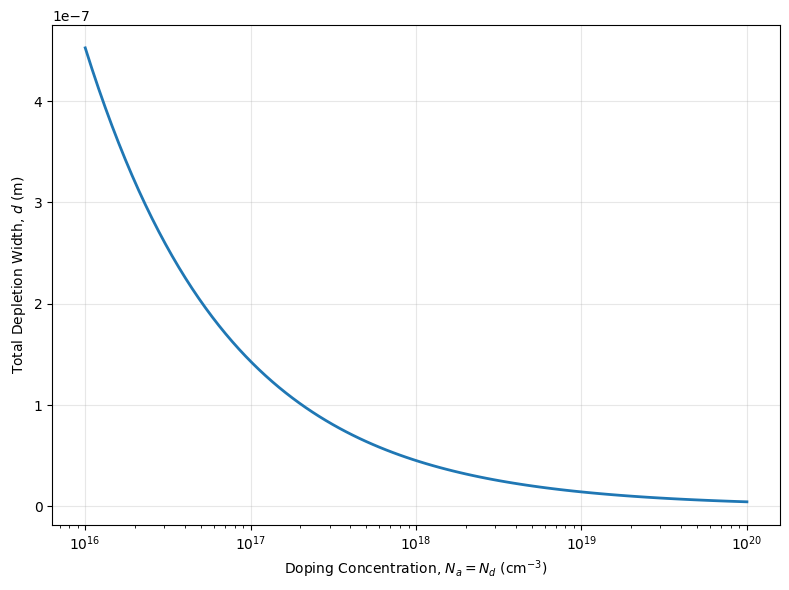

In [33]:
# Task 1
import os
import numpy as np
import matplotlib.pyplot as plt
os.environ["PYTHONDONTWRITEBYTECODE"] = "1"  # Prevent .pyc files
os.makedirs('../plots', exist_ok=True)
q = 1.6e-19; eps_0 = 8.854e-12; eps_r = 11.7; V_bi = 0.791
N = np.logspace(16, 20, 100) * 1e6
d = np.sqrt(2 * eps_r * eps_0 * V_bi / q * (2 / N))
plt.figure(figsize=(8, 6))
plt.plot(N / 1e6, d, linewidth=2)
plt.xscale('log')
plt.xlabel('Doping Concentration, $N_a = N_d$ (cm$^{-3}$)')
plt.ylabel('Total Depletion Width, $d$ (m)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../plots/depletion_width.png', dpi=300, bbox_inches='tight')
plt.show()

Comment: Evaluate accuracy and interpret d ∝ 1/√N. Builds intuition (PBL Level 1).

## Task 2: Electric Field E(x)
Use poisson_solver.py to plot E(x) for N_a = N_d = 1e16 cm^-3 (Figure 3).

Using poisson_solver from: c:\Users\earme\OneDrive\Desktop\pn-junction-modeling\code\poisson_solver.py


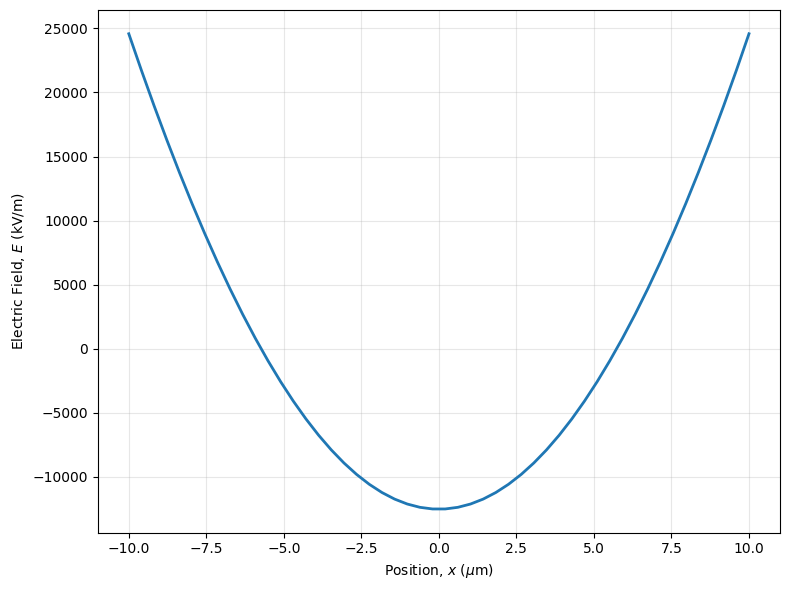

In [34]:
# Task 2
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
os.environ["PYTHONDONTWRITEBYTECODE"] = "1"  # Prevent .pyc files
base_dir = os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), 'code'))
sys.path.append(base_dir)
from poisson_solver import poisson_solver
plots_dir = os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), 'plots'))
os.makedirs(plots_dir, exist_ok=True)
print(f"Using poisson_solver from: {os.path.join(base_dir, 'poisson_solver.py')}")
x = np.linspace(-1e-5, 1e-5, 50)
try:
    E, phi = poisson_solver(1e16 * 1e6, 1e16 * 1e6, 0.791, x=x, delta=2e-5)
    plt.figure(figsize=(8, 6))
    plt.plot(x * 1e6, E / 1e3, linewidth=2)
    plt.xlabel('Position, $x$ ($\\mu$m)')
    plt.ylabel('Electric Field, $E$ (kV/m)')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(os.path.join(plots_dir, 'E_comparison.png'), dpi=300, bbox_inches='tight')
    plt.show()
except Exception as e:
    print(f"Error: {e}")

## Task 3: Sensitivity to Smoothing Parameter
Analyze the sensitivity of E(x) to the smoothing parameter δ for N_a = 1e18 cm^-3, N_d = 1e16 cm^-3. Plot RMS error vs δ (Figure 5).

Using poisson_solver from: c:\Users\earme\OneDrive\Desktop\pn-junction-modeling\code\poisson_solver.py


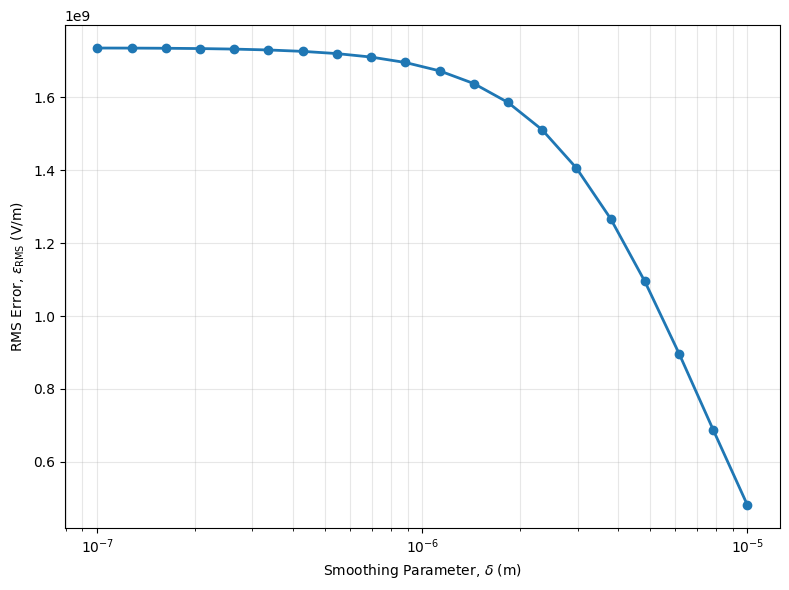

In [35]:
# Task 3
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
os.environ["PYTHONDONTWRITEBYTECODE"] = "1"  # Prevent .pyc files
base_dir = os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), 'code'))
sys.path.append(base_dir)
from poisson_solver import poisson_solver
plots_dir = os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), 'plots'))
os.makedirs(plots_dir, exist_ok=True)
print(f"Using poisson_solver from: {os.path.join(base_dir, 'poisson_solver.py')}")
x = np.linspace(-1e-5, 1e-5, 50)
deltas = np.logspace(-7, -5, 20)  # Reduced range and points for stability
rms_values = []
try:
    E_ref, _ = poisson_solver(1e18 * 1e6, 1e16 * 1e6, 0.791, x=x, delta=2e-5)
    for delta in deltas:
        E, _ = poisson_solver(1e18 * 1e6, 1e16 * 1e6, 0.791, x=x, delta=delta)
        rms = np.sqrt(np.mean((E - E_ref)**2))
        rms_values.append(rms)
    plt.figure(figsize=(8, 6))
    plt.plot(deltas, rms_values, 'o-', linewidth=2)
    plt.xscale('log')
    plt.xlabel('Smoothing Parameter, $\\delta$ (m)')
    plt.ylabel('RMS Error, $\\epsilon_{\\mathrm{RMS}}$ (V/m)')
    plt.grid(True, which='both', alpha=0.3)
    plt.tight_layout()
    plt.savefig(os.path.join(plots_dir, 'sensitivity_delta.png'), dpi=300, bbox_inches='tight')
    plt.show()
except Exception as e:
    print(f"Error: {e}")